![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Foundations of Machine Learning Frameworks
&nbsp; 

CSCN8010 - Winter 2024
&nbsp; 

Professor: Ran Feldesh
&nbsp;

Student: Arcadio de Paula Fernandez

# Practical Lab 6 - Logistic Regression

# 1. Framing the Problem - Describe the goal of this report

The goal is to classify the species of an Iris flower given the dimensions of parts of the flower.
The iris data set consists of the physical parameters of three species of flower — Setosa, Versicolor and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features.

The classification is binary, there are two classes: virginica and non-virginica. 

Using SciKit-Learn, train a binary logistic regression model on a dataset. 


Scikit-Learn provides toy datasets ([list](https://scikit-learn.org/stable/datasets/toy_dataset.html)). Here we will use the Iris dataset ([description](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)).


![Image](https://zahidhasan.github.io/images/iris.png)



A solução do professor está aqui

https://github.com/arcadiopfz/CSCN8010/blob/main/class_notebooks/logistic_regression/logistic_regression.ipynb

# 2. Importing libraries, loading dataset and exploratory data analysis (EDA)

## 2.1. Importing all the essential libraries and sub modules

In [1]:
from sklearn import datasets

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 2.2. Loading the diabetes dataset from Scikit-Learn 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

## 2.3.  Original data:  Exploratory data analysis EDA - Describing the data, explore it, and provide insights about it. 

### 2.3.1. EDA on original data

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [8]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [9]:
X = iris.data[["petal width (cm)"]].values
type(X)
X.size

150

### 2.3.2. Data frame and graphic analyses of the original data

In [10]:
df = sns.load_dataset('iris')
df.head()
# x = df.iloc[:,0:4]
# y = df.iloc[:,4:5].values.ravel() # flatten the numpy array

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


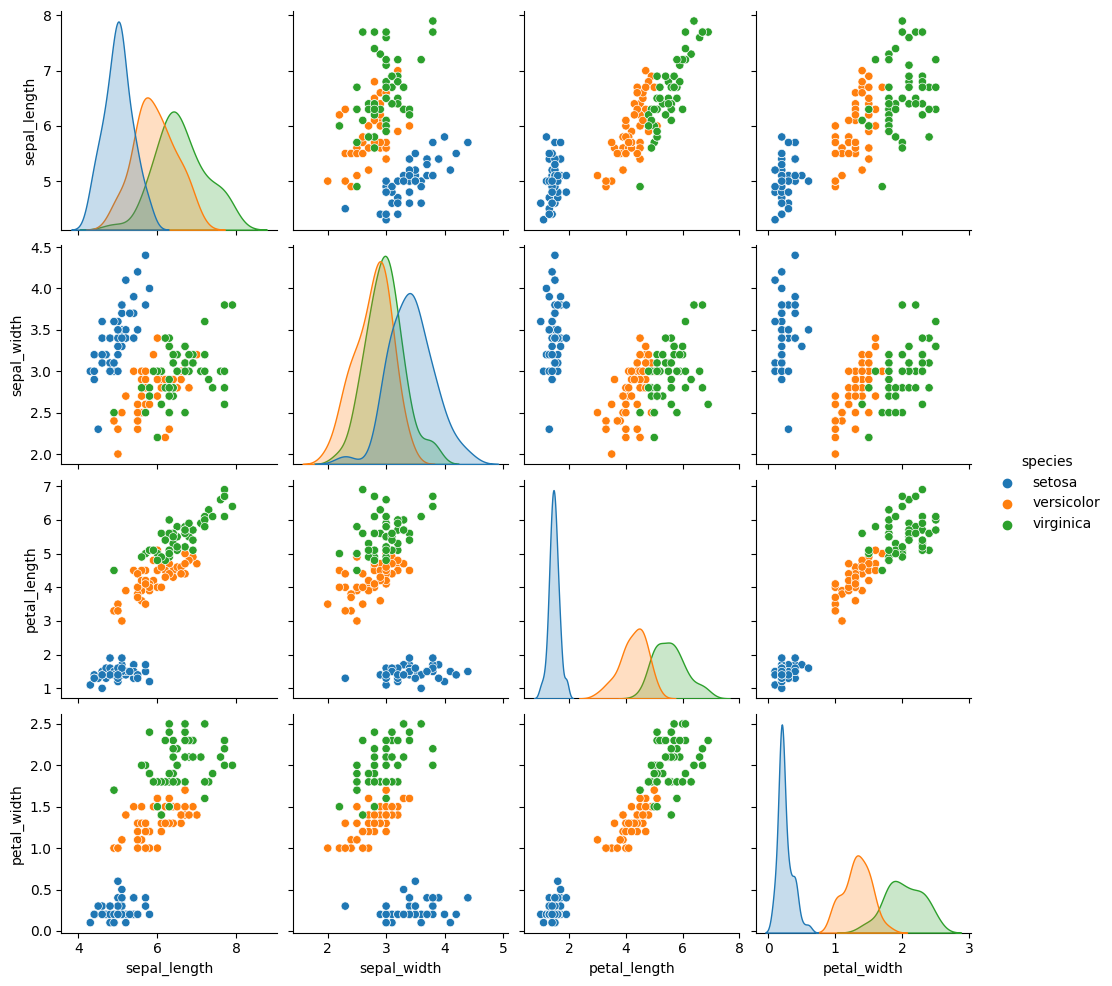

In [11]:
sns.pairplot(data=df, hue='species')

## 2.4.  Redefine 2 classes for the target variable: virginica and non-virginica -  Exploratory data analysis EDA - Describing the data, explore it, and provide insights about it. 

### 2.4.1. Counting target variable: virginica

In [12]:
y = iris.target_names[iris.target] == 'virginica'
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
y = iris.target[iris.target] == 'virginica'
y

0    False
0    False
0    False
0    False
0    False
     ...  
2    False
2    False
2    False
2    False
2    False
Name: target, Length: 150, dtype: bool

In [14]:
virginica_count = sum(y)
print(virginica_count)

0


### 2.4.2. Redefining 2 classes for the target variable: virginica and non-virginica

In [15]:

df['species'] = df['species'].apply(lambda x: 'virginica' if x == 'virginica' else 'non-virginica')

df_target = df
df_target 



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,non-virginica
1,4.9,3.0,1.4,0.2,non-virginica
2,4.7,3.2,1.3,0.2,non-virginica
3,4.6,3.1,1.5,0.2,non-virginica
4,5.0,3.6,1.4,0.2,non-virginica
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### 2.4.2.1. Separating the dataset into two classes

In [16]:
virginica_df = df[df['species'] == 'virginica']
non_virginica_df = df[df['species'] == 'non-virginica']

print(virginica_df,non_virginica_df)

     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica
103           6.3          2.9           5.6          1.8  virginica
104           6.5          3.0           5.8          2.2  virginica
105           7.6          3.0           6.6          2.1  virginica
106           4.9          2.5           4.5          1.7  virginica
107           7.3          2.9           6.3          1.8  virginica
108           6.7          2.5           5.8          1.8  virginica
109           7.2          3.6           6.1          2.5  virginica
110           6.5          3.2           5.1          2.0  virginica
111           6.4          2.7           5.3          1.9  virginica
112           6.8          3.0           5.5          2.1  virginica
113           5.7          2.5    

### 2.4.3. Creating a table with descriptive statistics for each of the two classes: virginica and non-virginica

In [17]:
# Group the DataFrame by 'species' and calculate descriptive statistics for each group
df_table_stats = df_target.groupby('species').describe()
df_table_stats


sepal_length                                               
                     count   mean       std  min    25%  50%  75%  max   
species                                                                  
non-virginica        100.0  5.471  0.641698  4.3  5.000  5.4  5.9  7.0  \
virginica             50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

              sepal_width         ... petal_length      petal_width          
                    count   mean  ...          75%  max       count   mean   
species                           ...                                        
non-virginica       100.0  3.099  ...        4.325  5.1       100.0  0.786  \
virginica            50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                  
                    std  min  25%  50%  75%  max  
species                                           
non-virginica  0.565153  0.1  0.2  0.8  1.3  1.8  
virginica      0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

 ### 2.4.4. Creating 1 histograms per feature, for each of the two classes. 

 ### 2.4.4.1. Histograms per feature

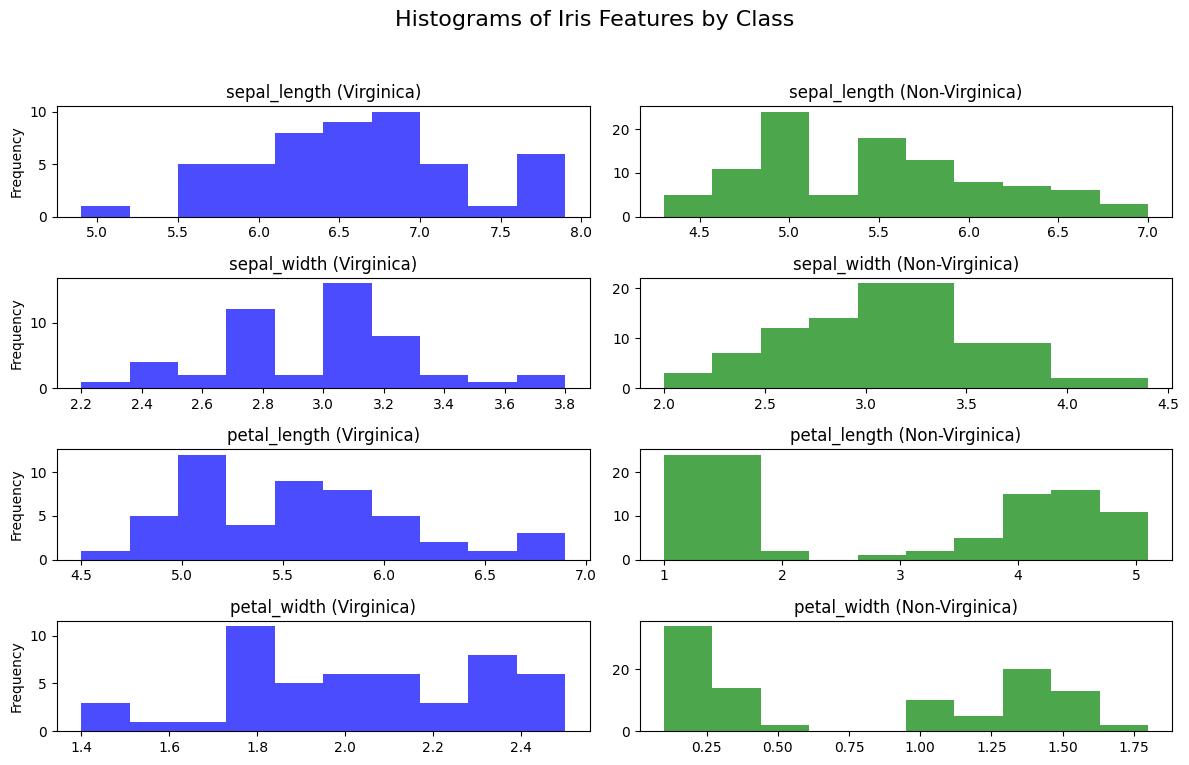

In [18]:
# Define features for histograms
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Set up the matplotlib figure
fig, axes = plt.subplots(len(features), 2, figsize=(12, 8))

# Set a title for the entire figure
fig.suptitle('Histograms of Iris Features by Class', fontsize=16)

for i, feature in enumerate(features):
    # Histogram for Virginica class
    axes[i, 0].hist(virginica_df[feature], bins=10, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'{feature} (Virginica)')
    axes[i, 0].set_ylabel('Frequency')
    
    # Histogram for Non-Virginica class
    axes[i, 1].hist(non_virginica_df[feature], bins=10, color='green', alpha=0.7)
    axes[i, 1].set_title(f'{feature} (Non-Virginica)')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


 ### 2.4.4.1. Histograms per feature, using the `hue` argument to distinguish between classes in the same graph

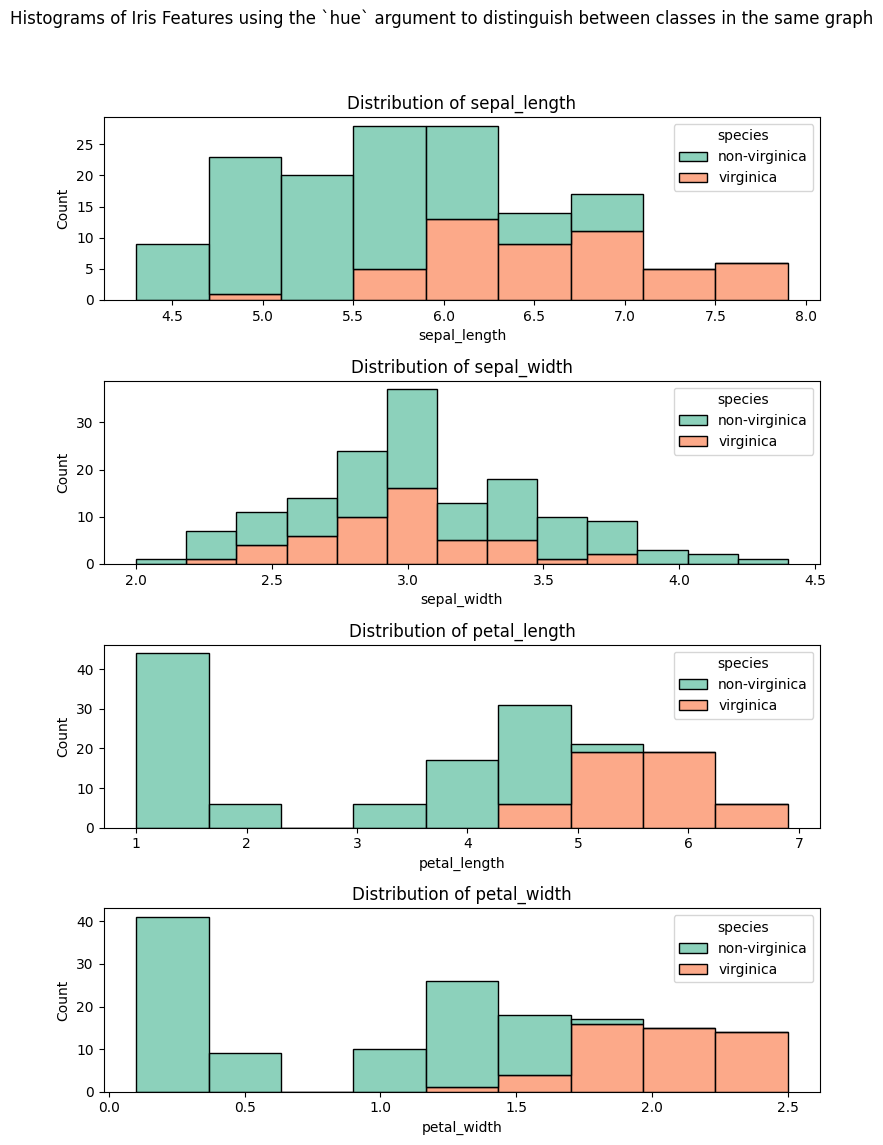

In [19]:
# Set up the matplotlib figure for seaborn histograms with hue
fig, axes = plt.subplots(len(features), 1, figsize=(8, 12))

# Set a title for the entire figure
fig.suptitle('Histograms of Iris Features using the `hue` argument to distinguish between classes in the same graph', fontsize=12)

for i, feature in enumerate(features):
    # Histogram for each feature with hue to distinguish classes
    sns.histplot(data=df_target, x=feature, hue='species', multiple="stack", palette="Set2", ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### 2.4.5. Creating a correlation matrix between the four features 

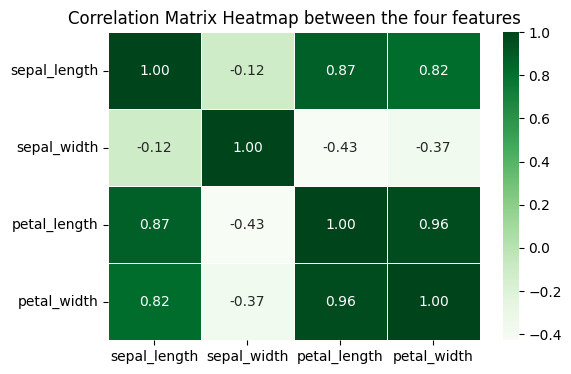

In [20]:
correlation_matrix = df_target[features].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap between the four features')
plt.show()

### 2.4.6. Creating additional graphs and explaing the meaning of this graph and what can we learn from it

Reference to the source of the graphs: https://zahidhasan.github.io/2022/02/10/classification-with-iris-dataset-using-scikit-learn-and-tensorflow.html

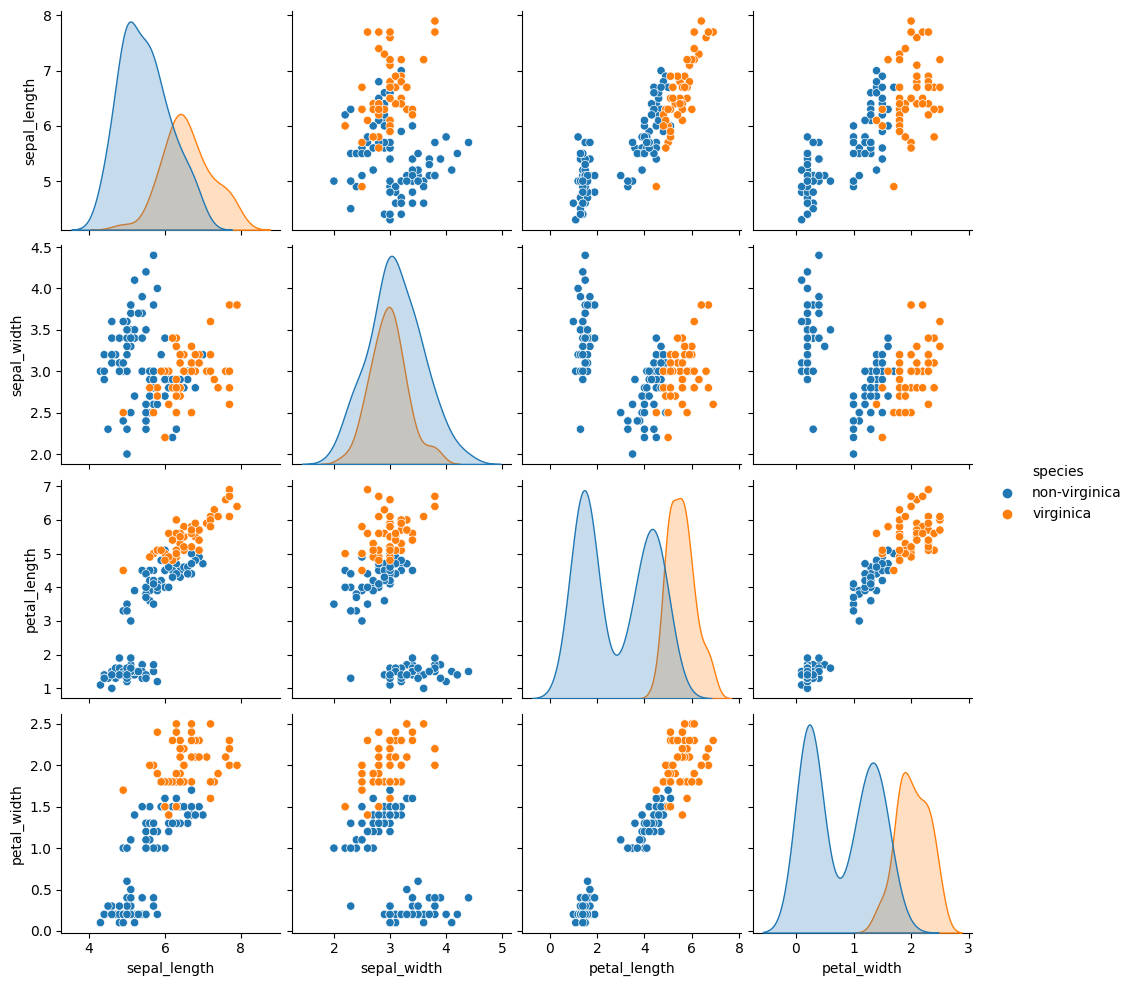

In [21]:
g = sns.pairplot(data=df_target, hue='species')



Our graph brings a scatterplot matrix with distribution plots. This is used to understand the relationship between different variables in a dataset and to identify correlations, and clusters.

This matrix of graphs is like a summary of the histogram graphs and the correlation heatmap.

Sepal Length vs Sepal Length: The virginica has a larger length and the non-virginica has a higher frequency(count)  as can be seen also in the first  Histogram of Iris Features using the `hue` argument. 

Sepal Width vs Sepal Width:  The virginica and the non-virginica overlap distributions, indicating that by analyzing the sepal width we can't distinguish between the classes. 

In the scatterplots, inside the matrix, by analyzing petal length and petal width we can see a strong positive correlation, this means that as petal length increases, the petal width also tends to increase. This was confirmed in the correlation heatmap where the correlation between these two features is 0.96.  

## 3.  Split the data to a train set (120 records), a validation set (15 records)  and a test set (15 records).

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split


# # Explicitly create copies of the DataFrames to avoid SettingWithCopyWarning
virginica_df_copy = virginica_df.copy()
non_virginica_df_copy = non_virginica_df.copy()

# # Safely add a label column to each DataFrame copy
virginica_df_copy['Label'] = 1  # or 'virginica'
non_virginica_df_copy['Label'] = 0  # or 'non_virginica'

# # Combine the DataFrame copies
combined_df = pd.concat([virginica_df_copy, non_virginica_df_copy], ignore_index=True)

# Separate features and labels
features = combined_df.drop('Label', axis=1)
labels = combined_df['Label']

# Split the combined DataFrame into training (80%), validation (10%), and test sets (10%)
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the splits to verify
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)


Training set size: (120, 5) (120,)
Validation set size: (15, 5) (15,)
Test set size: (15, 5) (15,)


## 4. Run four logistic regression models models, with 1,2,3 and 4 features. 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Placeholder for actual feature names
feature_names = features.columns.tolist()

# Selecting features based on hypothetical reasoning
# Replace 'Feature1', 'Feature2', etc., with actual feature names from your dataset
feature_subsets = [
    [feature_names[0]],  # Model 1: First feature
    [feature_names[0], feature_names[1]],  # Model 2: First two features
    [feature_names[0], feature_names[1], feature_names[2]],  # Model 3: First three features
    [feature_names[0], feature_names[1], feature_names[2], feature_names[3]]  # Model 4: First four features
]

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for i, subset in enumerate(feature_subsets, start=1):
    # Select the subset of features
    X_train_subset = X_train[subset]
    X_test_subset = X_test[subset]
    
    # Initialize the logistic regression model
    model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
    model.fit(X_train_subset, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the performance
    model_name = f"Model {i} with features {', '.join(subset)}"
    model_performance[model_name] = accuracy

print("Model Performance on Test Set:")
# Display the performance of each model
for model_name, accuracy in model_performance.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")


Model Performance on Test Set:
Model 1 with features sepal_length: Accuracy = 0.9333
Model 2 with features sepal_length, sepal_width: Accuracy = 0.8667
Model 3 with features sepal_length, sepal_width, petal_length: Accuracy = 1.0000
Model 4 with features sepal_length, sepal_width, petal_length, petal_width: Accuracy = 1.0000


## 5. Evaluate the models on the validation set:

#### 5.1. Use the predict and predict_proba methods to list in a table how well each model is doing for each of the instances in the validation set. There should be one table per model. Each table should have four columns: instance number, probability of predicting verginica, actual prediction by the model, ground truth.

In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Placeholder for actual feature names from your dataset
feature_names = features.columns.tolist()

# Define feature subsets for the models using actual feature names
feature_subsets = [
    [feature_names[0]],  # Replace with actual feature names
    [feature_names[0], feature_names[1]],
    [feature_names[0], feature_names[1], feature_names[2]],
    [feature_names[0], feature_names[1], feature_names[2], feature_names[3]]
]

# Placeholder for results storage
results = []

# Evaluate each model on the validation set
for i, subset in enumerate(feature_subsets, start=1):
    # Select the subset of features for the validation set
    X_val_subset = X_val[subset]
    
    # Use the trained logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train[subset], y_train)  # Retrain using training data
    
    # Predictions and probabilities
    predictions = model.predict(X_val_subset)
    probabilities = model.predict_proba(X_val_subset)[:, 1]  # Probability of predicting virginica
    
    # Store results
    results.append(pd.DataFrame({
        'Instance Number': range(1, len(X_val_subset) + 1),
        'Probability of Predicting Virginica': probabilities,
        'Actual Prediction by the Model': predictions,
        'Ground Truth': y_val.values
    }).set_index('Instance Number'))

for i, result in enumerate(results, start=1):
    # Correct way to reference feature subsets within the print statement
    features_used = ", ".join(feature_subsets[i-1])  # Adjusting index since enumerate starts at 1
    print(f"Model {i} with features: {features_used}")
    
    display(result)
    print("\n")



Model 1 with features: sepal_length


,Probability of Predicting Virginica,Actual Prediction by the Model,Ground Truth
Instance Number,,,
1,0.456034,0,1
2,0.951709,1,1
3,0.456034,0,0
4,0.226398,0,0
5,0.092691,0,0
6,0.706019,1,0
7,0.660526,1,0
8,0.134676,0,0
9,0.912898,1,1




Model 2 with features: sepal_length, sepal_width


,Probability of Predicting Virginica,Actual Prediction by the Model,Ground Truth
Instance Number,,,
1,0.479471,0,1
2,0.959637,1,1
3,0.562798,1,0
4,0.224412,0,0
5,0.075183,0,0
6,0.701130,1,0
7,0.668007,1,0
8,0.085488,0,0
9,0.919029,1,1




Model 3 with features: sepal_length, sepal_width, petal_length


,Probability of Predicting Virginica,Actual Prediction by the Model,Ground Truth
Instance Number,,,
1,0.450061,0,1
2,0.998657,1,1
3,0.245629,0,0
4,0.104300,0,0
5,0.000008,0,0
6,0.569194,1,0
7,0.258009,0,0
8,0.000018,0,0
9,0.980081,1,1




Model 4 with features: sepal_length, sepal_width, petal_length, petal_width


,Probability of Predicting Virginica,Actual Prediction by the Model,Ground Truth
Instance Number,,,
1,0.534566,1,1
2,0.998607,1,1
3,0.247335,0,0
4,0.058254,0,0
5,0.000003,0,0
6,0.554341,1,0
7,0.153891,0,0
8,0.000009,0,0
9,0.971036,1,1


#### 5.2. Summarize the data in each table to a single measure (number) per model.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Assuming X_train, y_train, X_val, and y_val are already defined
# Assuming feature_subsets is a list of lists, where each sublist contains feature names for a model

# Placeholder for accuracy scores and model details
model_details = []

# Train and evaluate models based on specified feature subsets
for i, subset in enumerate(feature_subsets, start=1):
    # Initialize the model
    model = LogisticRegression(max_iter=1000)
    
    # Split training and validation data based on the current subset of features
    X_train_subset = X_train[subset]
    X_val_subset = X_val[subset]
    
    # Train the model on the training set
    model.fit(X_train_subset, y_train)
    
    # Predict on the validation set
    predictions = model.predict(X_val_subset)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, predictions)
    
    # Get the features used for this model
    features_used = ", ".join(subset)
    
    # Append both accuracy and features used to the list
    model_details.append((f"Model {i} with features: {features_used}", accuracy))

# Convert the list to a DataFrame for a nicer display
model_details_df = pd.DataFrame(model_details, columns=['Model', 'Accuracy'])

pd.set_option('display.max_colwidth', None)  # Adjust this as per your requirement

# Display the DataFrame
model_details_df



,Model,Accuracy
0,Model 1 with features: sepal_length,0.733333
1,"Model 2 with features: sepal_length, sepal_width",0.666667
2,"Model 3 with features: sepal_length, sepal_width, petal_length",0.866667
3,"Model 4 with features: sepal_length, sepal_width, petal_length, petal_width",0.933333


## 6. Plot the decision boundary for three models (with 1, 2 and 3 features; 3 plots), together with the validation data. 

Tip: using Plotly will allow you to rotate the 3D graph with the 3 features. Tip: for the code required to find the decision boundary you can look at this notebook in the course repository. 

In [26]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(int)  # Only considering 'virginica' as 1, others as 0

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the combined DataFrame into training (80%), validation (10%), and test sets (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Function to train logistic regression models with specified number of features
def train_logistic_regression(n_features):
    model = LogisticRegression(random_state=42)
    model.fit(X_train[:, :n_features], y_train)
    return model

# Train models with 1, 2, and 3 features
model_1_feature = train_logistic_regression(1)
model_2_features = train_logistic_regression(2)
model_3_features = train_logistic_regression(3)

# Prepare a function for plotting decision boundaries which will be used later
def plot_decision_boundary(model, X, y, n_features):
    # Placeholder for decision boundary plotting logic based on the number of features
    pass

# Placeholder for the actual plotting code
"Models trained. Ready to plot decision boundaries."


'Models trained. Ready to plot decision boundaries.'

In [27]:
import plotly.graph_objects as go


# Plotting function for 1 feature
def plot_decision_boundary_1_feature(model, X, y):
    # Create a grid of values and predict for each value
    x_min, x_max = X.min() - 1, X.max() + 1
    xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    yy = model.predict_proba(xx)[:, 1]
    
    # Plotting
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=xx.ravel(), y=yy, mode='lines', name='Decision Boundary'))
    fig.add_trace(go.Scatter(x=X.ravel(), y=y, mode='markers', name='Validation Data',
                             marker=dict(color=y, colorscale='Viridis', line=dict(color='black', width=1))))
    fig.update_layout(title='Decision Boundary for 1 Feature Model',
                      xaxis_title='Feature Value',
                      yaxis_title='Probability of Virginica')
    return fig

# Plotting function for 2 features
def plot_decision_boundary_2_features(model, X, y):
    # Create a grid of values
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting
    fig = go.Figure(data=[
        go.Contour(x=np.linspace(x_min, x_max, 100), y=np.linspace(y_min, y_max, 100), z=Z,
                   showscale=False, colorscale='Cividis', line_width=0),
        go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(color=y, colorscale='Spectral', line=dict(color='black', width=1)),
                   name='Validation Data')
    ])
    fig.update_layout(title='Decision Boundary for 2 Features Model',
                      xaxis_title='Feature 1',
                      yaxis_title='Feature 2')
    return fig

# Generate plots for 1-feature and 2-features models
# fig_1_feature = plot_decision_boundary_1_feature(model_1_feature, X_valid[:, :1], y_valid)
# fig_2_features = plot_decision_boundary_2_features(model_2_features, X_valid[:, :2], y_valid)

fig_1_feature = plot_decision_boundary_1_feature(model_1_feature, X_test[:, :1], y_test)
fig_2_features = plot_decision_boundary_2_features(model_2_features, X_test[:, :2], y_test)

# Display the plots
# fig_1_feature.show()
# fig_2_features.show()

# Display the plotly plots offline
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Use iplot to display the figure in the notebook
py.iplot(fig_1_feature)
py.iplot(fig_2_features)


In [28]:
# Calculate the decision boundary for 3 features
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

x1, x2 = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
decision_boundary_x3 = (-model_3_features.intercept_ / model_3_features.coef_[0][2]
                        - model_3_features.coef_[0][0] / model_3_features.coef_[0][2] * x1
                        - model_3_features.coef_[0][1] / model_3_features.coef_[0][2] * x2)

# Plotting the validation data and the decision boundary in 3D
fig = go.Figure(data=[go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=X_test[:, 2], mode='markers',
                                   marker=dict(color=y_test, size=5, colorscale='Viridis', opacity=0.8),
                                   name='Validation Data'),
                      go.Surface(x=x1, y=x2, z=decision_boundary_x3, colorscale='RdBu', opacity=0.5, name='Decision Boundary')])

fig.update_layout(title='3 Features Model with Decision Boundary',
                  scene=dict(xaxis_title='Feature 1',
                             yaxis_title='Feature 2',
                             zaxis_title='Feature 3'),
                  margin=dict(l=0, r=0, b=0, t=0))
# fig.show()


# Display the plotly plots offline
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Use iplot to display the figure in the notebook
py.iplot(fig)


## 7. Failure modes: using the two preceding steps, in which types of data instances is each model wrong?

Can you identify some failure patterns within a model or across models?

Model 1 with one feature (sepal_length) has an accuracy of 0.733333, as we calculated. Analyzing the decision Boundary for Model 1 we can deduce that some data points are actually 'virginica' and others below the decision boundary are classified as "non-virginica' by the model. What is a certain point doesn't help us to identify the dots that were classified wrong. 


Model 2 with two features (sepal_length, sepal_width) which we calculate has an accuracy of 0.666667, which is worse than model 1. On the other hand, by analyzing the decision boundary for Model 2 we can identify that actually 'Virginia'  but falls below the decision boundary (the step line) is classified as 'non-virginica' by the model, showing that this type of graph assists us to identify the dots that were classified wrong.

Model 3 with three features (ssepal_length, sepal_width, petal_length) has a higher accuracy of 0.866667.  By analyzing the decision boundary for Model 3 the decision boundary did better work by identifying 'Virginia' and 'non-virginica' dots, which assist in the classification task.

## 8. Recommend the best model (provide reasoning). 

 Summarize the results of this model on the test set. Tip: you can use the "single-number" measure you used on the validation set. 

Higher accuracy in a logistic regression model is what want we as a measure to recommend the best model. And this is what happens in Model 4 with 4 features ( sepal_length, sepal_width, petal_length, petal_width) with the higher accuracy ( 0.933333) of all four models.  On Test Set Model 4 performance accuracy = 1.0000 with Model 3, as can be seen on item 4 of this notebook. So by having these two higher accuracies for model 4, we can recommend the best model.   